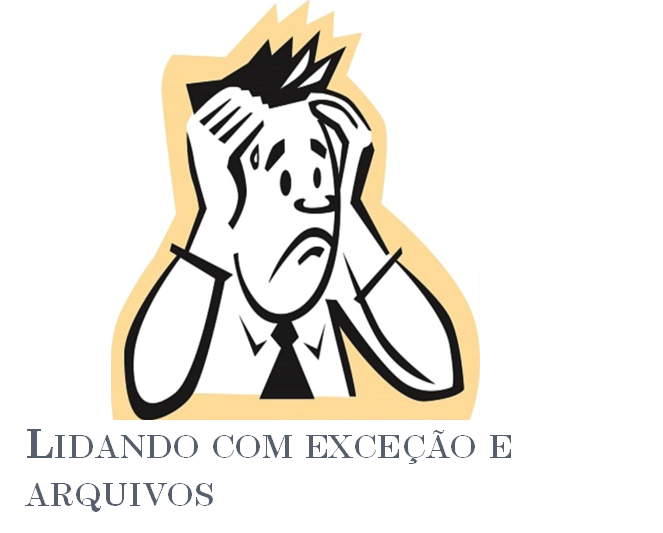

# Arquivos

Python vê um arquivo de texto como uma sequência de caracteres e um arquivo binário (para imagens, vídeos e outros) como uma sequência de bytes. Como em listas e matrizes, o primeiro caractere em um arquivo de texto e um byte em um arquivo binário está localizado na posição 0, portanto, em um arquivo de n caracteres ou bytes, o maior
o número da posição é n - 1. O diagrama abaixo mostra uma visão conceitual de um arquivo:

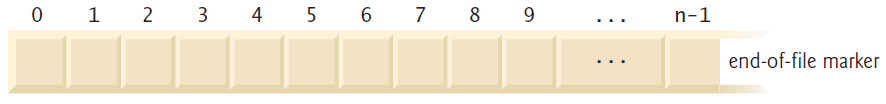

Para cada arquivo que você abrir, o Python cria um objeto de arquivo que você usará para interagir com o arquivo.

#### Fim do arquivo
Cada sistema operacional fornece um mecanismo para denotar o fim de um arquivo. Alguns representam
com um marcador de fim de arquivo (como na figura anterior), enquanto outros podem manter um
contagem do total de caracteres ou bytes no arquivo. Linguagens de programação geralmente se escondem
esses detalhes do sistema operacional de você

### Objetos de arquivo padrão (*Standard file objects*)
Quando um programa Python começa a ser executado, ele cria três objetos de arquivo padrão:

**sys.stdin (standard input stream)** 
- permite a um programa receber entrada do teclado ou de outro dispositivo.

**sys.stdout (standard output stream)** 
- fornece ao programa a capacidade de exibir os dados de saída na tela ou em outro dispositivo.

**sys.stderr (standard error stream)** 
- permite ao programa exibir mensagens de erro na tela ou em outros disponitivos.


Embora sejam considerados objetos de arquivo, eles não leem ou gravam em arquivos por padrão.
- A função **input** entrada usa implicitamente **sys.stdin** para obter a entrada do usuário a partir do teclado. 
- A Função **print** imprime saídas implicitamente para **sys.stdout**, que aparece na linha de comando. 
- Python gera erros de programa implicitamente e rastreia para **sys.stderr**, que também aparece na linha de comando. 
    - Você deve importar o módulo **sys** se precisar se referir a esses objetos explicitamente em seu código, mas isso é raro.

### Escrevendo em um arquivo de texto: Apresentando a declaração *with*

Vamos criar um arquivo **accounts.txt** e gravar cinco registros de cliente no arquivo. 
    
- Geralmente, registros em arquivos de texto são armazenados um por linha, então terminamos cada registro com um caractere de nova linha.

In [1]:
with open('accounts.txt', mode='w') as accounts:
     accounts.write('100 Jones 24.98\n')
     accounts.write('200 Doe 345.67\n')
     accounts.write('300 White 0.00\n')
     accounts.write('400 Stone -42.16\n')
     accounts.write('500 Rich 224.62\n')

Você também pode gravar em um arquivo com **print** (que gera automaticamente um \ n), como em

In [2]:
print('600 James 4.98', file=accounts)

ValueError: I/O operation on closed file.

#### A declaração with
Muitos aplicativos adquirem recursos, como arquivos, conexões de rede, conexões de banco de dados, etc. 

Você deve liberar recursos assim que eles não forem mais necessários. 
Essa prática garante que outros aplicativos possam usar os recursos. A declaração **with**:
- adquire um recurso (neste caso, o objeto de arquivo para accounts.txt) e atribui seu objeto correspondente a uma variável (*accounts* neste exemplo),
- permite que o aplicativo use o recurso por meio dessa variável, e
- chama o método *close* do objeto do recurso invocado para liberar o recurso quando o controle do programa chega ao final da instrução **with**.

#### A função open

Abre o arquivo **accounts.txt** e o associa a um objeto de arquivo.
O argumento **mode** especifica o modo de abertura do arquivo, indicando se deve ser aberto um arquivo para leitura, para gravação ou ambos. 
- O modo **'w'** abre o arquivo para gravação, criando o arquivo se ele não existir. 
- Se você não especificar um caminho para o arquivo, Python o cria na pasta atual. 
    
> <font color=red>Tenha cuidado - abrir um arquivo para gravação exclui todos os dados existentes no arquivo.</font> 
  
Por convenção, a extensão do arquivo .txt indica um arquivo de texto simples.

**Exercício** - Crie um arquivo *notas.txt* e escreva nele registros
consistindo em RAs de alunos, sobrenomes e notas de letras:

### Lendo dados de um arquivo de texto

Acabamos de criar o arquivo de texto **accounts.txt** e gravamos os dados nele. Agora vamos ler esses dados do arquivo sequencialmente, do início ao fim. 

A sessão a seguir lê os registros de o arquivo **accounts.txt** e exibe o conteúdo de cada registro em colunas. Nas quais, a colunas da *Account* e do *Name* são alinhadas à esquerda e a coluna *Balance* alinhada à direita.

In [2]:
with open('accounts.txt', mode='r') as accounts:
     print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
     for record in accounts:
         account, name, balance = record.split()
         print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


Se o conteúdo de um arquivo não deve ser modificado, abra o arquivo apenas para leitura. 
- Isso evita que o programa acidentalmente modifique o arquivo. 
- Você abre um arquivo para leitura passando **mode='r'** na abertura do arquivo.
- Se você não especificar a pasta na qual armazenar o arquivo, **open** assume que o arquivo está na pasta atual.

A iteração por meio de um objeto de arquivo, conforme mostrado na instrução for anterior, lê uma linha por vez e o **retorna como uma string**. 
- Para cada registro (ou seja, linha) no arquivo, o método de string **split** retorna os tokens na linha como uma lista, que descompactamos nas variáveis *account*, *name*, *balance*.  - A última linha imprime as variáveis em colunas usando larguras de campo. 

#### O método de arquivo readlines
O método readlines do objeto de arquivo também pode ser usado para ler um arquivo de texto inteiro. 

O método retorna cada linha como uma string em uma lista de strings. 
- Para arquivos pequenos, isso funciona bem, mas iterando sobre as linhas em um objeto de arquivo, como mostrado acima, pode ser mais eficiente.
- Chamar **readlines** para um arquivo grande pode ser uma operação demorada, que deve ser concluída antes que você comece a usar a lista de strings. 
- Usar o objeto de arquivo em uma instrução **_for_** habilita seu programa para processar cada linha de texto conforme ela é lida.

#### Buscando uma posição de arquivo específica

Ao ler um arquivo, o sistema mantém um ponteiro de posição do arquivo que representa a
localização do próximo caractere a ser lido. 
- Às vezes, é necessário processar um arquivo sequencialmente desde o início várias vezes durante a execução de um programa. 
- Cada vez, você deve reposicionar o ponteiro de posição do arquivo para o início do arquivo, que você pode fazer fechando e reabrindo o arquivo, ou chamando o método de busca do objeto de arquivo, como em:

**file_object.seek(0)**

**Exercício** - Leia o arquivo *notas.txt* que você criou na seção anterior e exiba-o em colunas com os cabeçalhos de coluna 'RA', 'Nome' e 'Nota'.

### Atualizando arquivos de texto

Os dados formatados gravados em um arquivo de texto não podem ser modificados sem o risco de destruição dos dados. 

Se o nome 'White' precisar ser alterado para 'Williams' em accounts.txt, o
o nome antigo não pode ser simplesmente substituído. O registro original para White é armazenado como: 

**<center>300 White 0.00</center>**

Se você substituir o nome 'White' pelo nome 'Williams', o registro torna-se:

**<center>300 Williams00</center>**

Para fazer a alteração do nome anterior, podemos:
- copiar os registros anteriores a 300 Branco 0,00 em um arquivo temporário,
- escrever o registro atualizado e formatado corretamente para a conta 300 neste arquivo,
- copie os registros após 300 Branco 0,00 para o arquivo temporário,
- exclua o arquivo antigo e
- renomear o arquivo temporário para usar o nome do arquivo original.

Isso pode ser complicado porque requer o processamento de todos os registros do arquivo, mesmo que você
precisa atualizar apenas um registro. Atualizar um arquivo conforme descrito acima é mais eficiente quando
um aplicativo precisa atualizar muitos registros em uma passagem do arquivo.

### Atualizando accounts.txt

Vamos usar o comando **with** para atualizar o arquivo *accounts.txt* para alterar o nome da conta 300 de 'White' a 'Williams' conforme descrito acima:

In [3]:
accounts = open('accounts.txt', 'r')
temp_file = open('temp_file.txt', 'w')

with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

A instrução **with** acima com gerencia dois objetos de recursos especificados em uma lista separada por vírgulas.
- A instrução for descompacta cada registro em *account*, *name*, *balance*. 
- Se a conta não for '300', gravamos o registro (que contém uma nova linha) para **temp_file**. 
    - Caso contrário, montamos o novo registro contendo 'Williams' ao invés de 'White' e escrevemos no arquivo. 

#### Funções de processamento de arquivo do módulo os

Neste ponto, temos o antigo arquivo *accounts.txt* e o novo *temp_file.txt*. 
- Para completar a atualização, vamos excluir o antigo arquivo *accounts.txt* e renomear *temp_file.txt* como *accounts.txt*. 

O módulo os fornece funções para interagir com o sistema operacional,
incluindo várias que manipulam os arquivos e diretórios do seu sistema. Agora que criamos o arquivo temporário, vamos usar a função **remove** para excluir o arquivo original:
(<font color=red>Use a remoção com cuidado - isso não avisa que você está excluindo o arquivo permanentemente.</font>)

In [4]:
import os

In [5]:
os.remove('accounts.txt')

In [6]:
os.rename('temp_file.txt', 'accounts.txt')

### Serialização com JSON

JSON (JavaScript Object Notation) é um formato de intercâmbio de dados baseado em texto, legível por humanos e por computador. Usado para representar objetos (como dicionários, listas e mais) como coleções de nomes–pares de valores. JSON pode até representar objetos de classes personalizadas.

JSON se tornou o formato de dados preferido para transmissão de objetos entre plataformas.
Isso é especialmente verdadeiro para invocar serviços da web baseados em nuvem, que são funções e
métodos que você chama pela Internet. Você se tornará proficiente em trabalhar com JSON
dados

#### Formato de dados JSON

Os objetos JSON são semelhantes aos dicionários Python. Cada objeto JSON contém uma lista, entre chaves, com pares: *nome da propriedades* - *valor* separados por vígulas . Por exemplo, os seguintes pares *chave–valores* poderiam representar um registro de cliente:

**{"account": 100, "name": "Jones", "balance": 24.98}**

JSON também oferece suporte a vetores que, como listas Python, são valores separados por vírgulas em quadrados colchetes. Por exemplo, o seguinte é uma matriz de números JSON aceitável:

**[100, 200, 300]**

Os valores em objetos e vetores JSON podem ser:
- strings entre aspas (como "Jones"),
- números (como 100 ou 24,98),
- Valores booleanos JSON (representados como *true* ou *false* em JSON),
- null (para representar nenhum valor, como Nenhum em Python),
- vetores (como [100, 200, 300]), e
- outros objetos JSON.

#### O módulo do Python json

O módulo **json** permite a conversão de objetos em JSON (JavaScript Object Notation)
no formato de texto. 
- Isso é conhecido como **_serialização_** dos dados. 

Considere o seguinte dicionário, que contém um par: *chave-valor* consistindo nas chaves  'contas' e seus valor associado sendo uma lista de dicionários que representam duas contas. Cada dicionário de conta contém três pares de valores-chave para o número da conta, nome e saldo:

In [7]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [8]:
accounts_dict

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

#### Serializando um objeto com json

Considere escrever esse objeto no formato JSON 

In [9]:
import json

In [10]:
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

O código acima, abre o arquivo *accounts.json* e usa a função de **dump** do módulo **json** para serializar o dicionário **accounts_dict** no arquivo. O arquivo resultante contém o seguinte texto:

#### Desserializando o texto JSON

A função **load** do módulo json carrega todo o conteúdo JSON de seu argumento de objeto de arquivo e converte o JSON em um objeto Python. Isso é conhecido como desserialização dos dados.
Vamos reconstruir o objeto Python original a partir deste texto JSON:

In [11]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [12]:
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

#### Exibindo o texto JSON

A função **dumps** do módulo **json** (dumps é uma abreviação de "dump string") retorna uma  representação de string de um objeto no formato JSON. Usando **dumps** com **load**, você pode ler o JSON do arquivo e exibi-lo em um formato bem recuado - às vezes chamado
“Impressão bonita” do JSON. 

Quando a chamada da função **dumps** inclui a palavra-chave **indent** como 
argumento, a string contém caracteres de nova linha e recuo para uma impressão bonita - você
também pode usar **indent** com a função **dump** ao gravar em um arquivo:

In [13]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


**Exercício** - Crie um arquivo JSON denominado notas.json e escreva nele o seguinte
dicionário:

**notas_dic = {'gradebook':
    [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
    {'student_id': 2, 'name': 'Green', 'grade': 'B'},
    {'student_id': 3, 'name': 'White', 'grade': 'A'}]}**

Em seguida, leia o arquivo e exiba seu JSON usando a 'impressão bonita'.

### Foco na segurança: serialização e Desserialização

O módulo **pickle** de Python pode serializar objetos em um formato específico de dados  ao Python. 

<font color=red> **Cuidado**: a documentação do Python fornece os seguintes avisos sobre o pickles:</font>

- **Arquivos Pickle podem ser hackeados**. Se você receber um arquivo de pickle pela rede, não confie! Ele poderia conter um código malicioso. 
    - No entanto, se você estiver fazendo sua própria escrita e leitura, você está seguro (desde que ninguém mais tenha acesso ao arquivo pickle, é claro.)
    
- “Pickle é um protocolo que permite a serialização de objetos Python arbitrariamente complexos. 
    - Como tal, é específico para Python e não pode ser usado para se comunicar com aplicativos escritos em outras linguagens. 
    
[Mais sobre Pickles](https://wiki.python.org/moin/UsingPickle)

### Ainda sobre arquivos

A tabela a seguir resume os vários modos de abertura de arquivo para arquivos de texto, incluindo o modos de leitura e escrita já apresentado. 

Os modos de *writing* e *appending* criam o arquivo se ele não existir. O modo *reading* gera um **FileNotFoundError** se o arquivo não existe. 

Cada modo de arquivo de texto tem um modo de arquivo binário correspondente especificado com b, como em 'rb' ou 'wb+'. 
Você usaria esses modos, por exemplo, se estivesse lendo ou escrevendo binários
arquivos, como imagens, áudio, vídeo, arquivos ZIP compactados e muitos outros populares
formatos de arquivo.

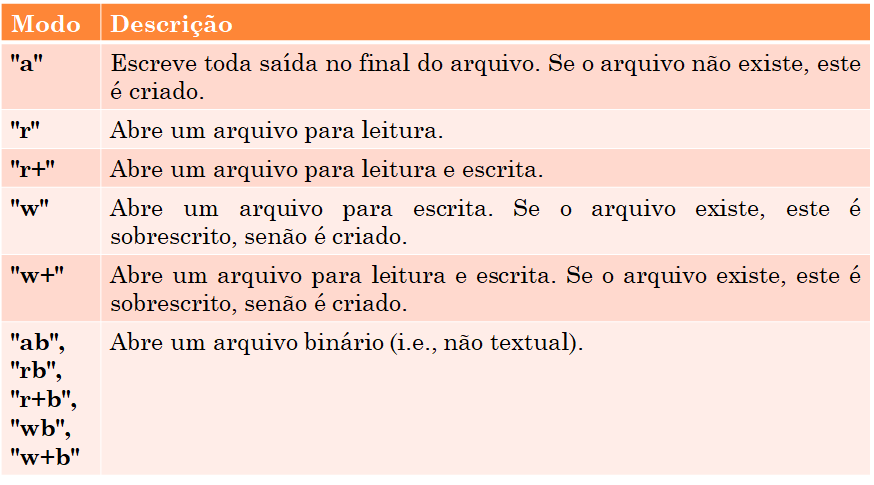

As classes que o Python usa para criar objetos de arquivo são definidas no [módulo io](https://docs.python.org/3/library/io.html).

# Lidando com exceções

Vários tipos de exceções podem ocorrer quando você trabalha com arquivos, incluindo:
- Ocorre um **FileNotFoundError** se você tentar abrir um arquivo inexistente para leitura com os modos 'r' ou 'r+'.
- Ocorrerá um **PermissionsError** se você tentar uma operação para a qual não tem permissão. Isso pode ocorrer se você tentar abrir um arquivo que sua conta é não tem permissão para acessar ou criar um arquivo em uma pasta onde sua conta não tem permissão para escrever, como o local onde o sistema operacional do seu computador está armazenado.
- Ocorre um **ValueError** (com a mensagem de erro 'Operação de E / S em arquivo fechado.') quando você tenta gravar em um arquivo que já foi fechado.

#### Divisão por zero e entrada inválida

Tentar dividir por 0 resulta em **ZeroDivisionError**

In [14]:
1/0

ZeroDivisionError: division by zero

Nesse caso, o interpretador **gera uma exceção** do tipo **ZeroDivisionError**. Quando
uma exceção é gerada no IPython, ele:
- termina o snippet,
- exibe o rastreamento da exceção (*traceback*), e
- mostra o próximo prompt **In []** para que você possa inserir o próximo trecho.

> Se ocorrer uma exceção em um script, o IPython termina o script e exibe a exceção traceback.

Lembre-se de que a função int gera um **ValueError** se você tentar converter para um inteiro um string (como 'hello') que não representa um número:

In [15]:
value = int(input('Digite um inteiro: '))

Digite um inteiro: oi


ValueError: invalid literal for int() with base 10: 'oi'

#### Declarações *try*

Agora vamos ver <font color=blue>como lidar com essas exceções para que você possa habilitar o código para continuar o processamento.</font>

Considere o seguinte script e execução de amostra. O laço tenta ler dois inteiros do usuário e, em seguida, exibe o primeiro número dividido pelo segundo. 
- O script lida com exceção tentando capturar e manipular (ou seja, lidar com) qualquer **ZeroDivisionErrors** e **ValueErrors** que surgem - neste caso, permitindo que o usuário insira novamente a entrada.

In [16]:
"""Lidando com exceções - Exemplo."""

while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError: # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError: # denominator was 0
        print('Attempted to divide by zero\n')
    else: # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break # terminate the loop

Enter numerator: we
You must enter two integers

Enter numerator: 1
Enter denominator: 0
Attempted to divide by zero

Enter numerator: 1
Enter denominator: 2
1.000 / 2.000 = 0.500


#### Cláusulas try

Python usa instruções **try** para habilitar o tratamento de exceções. 
- As declarações **try** começam com a palavra-chave **try**, seguida por dois pontos (**:**) e um **conjunto de declarações que podem levantar exceções**.

Cláusula **except**

Uma cláusula **try** pode ser seguida por *uma ou mais* cláusulas **except** que
siga imediatamente o corpo da cláusula **try**. 
- Elas também são conhecidas como manipuladores de exceção (*exception handlres*). 
- Cada cláusula **except** especifica o tipo de exceção que trata. 

Neste exemplo, cada manipulador de exceção apenas exibe uma mensagem indicando o problema que ocorreu.


Cláusula **else**

Após a última cláusula **except**, uma cláusula else opcional especifica o código que
deve ser <font color=blue>executado apenas se o código no conjunto try **não** gerou exceções</font>. 

#### Capturando múltiplas exceções com uma clausula **except*

É relativamente comum que uma cláusula **try** seja seguida por várias cláusulas **except** para lidar com vários tipos de exceções. 
- Se os vários corpos da cláusula **except** forem idênticos, você pode juntá-los, especificando-os como uma tupla em um único manipulador, como em:
**<center> except (type1, type2, …) as variable_name:</center>**

A cláusula **as** é opcional. Normalmente, os programas não precisam fazer referência ao objeto da exceção detectada diretamente. 
- Se preferi, você pode usar a variável na cláusula **as** para fazer referência ao objeto de exceção do conjunto **except**.

### A cláusula *finally*

Os sistemas operacionais normalmente podem impedir que mais de um programa manipule um arquivo
de uma vez só. 
- Quando um programa termina de processar um arquivo, o programa deve fechá-lo para liberar o recurso. 
- Isso permite que outros programas usem o arquivo (se eles tiverem permissão para acessá-lo).
- Fechar o arquivo ajuda a evitar um vazamento de recursos em que o recurso do arquivo não está disponível para outros programas porque um programa que usa o arquivo nunca o fecha.

Uma instrução **try** pode ter uma cláusula **finally** como sua última cláusula após qualquer cláusula **except** ou cláusula **else**. 
- <font color=blue>A cláusula **finally** tem garantia de execução, independentemente de seu corpo do **try** ser executado com sucesso ou ocorrer uma exceção.</font>

- Em outras linguagens que existe **finally**, este local é ideal para colocar código de desalocação de recursos para recursos adquirido no conjunto **try** correspondente. 
- Em Python, usa-se a insttrução with para este propósito e em **finally** coloca-se outros tipos de código de “limpeza”.

In [17]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


O conjunto try anterior exibe uma mensagem, mas não levanta nenhuma exceção. 
- Quando o controle do programa atinge com sucesso o final do corpo **try**,
- a cláusula except é ignorada, a cláusula **else** é executada 
- e a cláusula **finally** exibe uma mensagem mostrando que sempre executa.

Agora, vamos considerar uma instrução try em que ocorre uma exceção no pacote try:

In [18]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


### Combinando as declarações *with* e *try... except*

A maioria dos recursos que requerem liberação explícita, como arquivos, conexões de rede e conexões com banco de dados, têm exceções potenciais associadas ao processamento desses recursos. 

- Por exemplo, um programa que processa um arquivo pode gerar **IOErrors**. Por esse motivo, para o processamento de arquivos robusto, o código normalmente aparece em um **try** contendo uma instrução **with** para garantir que o recurso seja liberado. 

Como o código está em no corpo de **try**, você pode manipular quaisquer exceções que ocorram e você não precise de uma cláusula **finally** porque a cláusula **with** trata da desalocação de recursos.

Para demonstrar isso, suponha que você esteja pedindo ao usuário para fornecer o nome de um arquivo, e esse é fornecido incorretamente, como notaz.txt. 
- Nesse caso, a chamada **open** gera um **FileNotFoundError** ao tentar para abrir um arquivo inexistente:

In [19]:
open('notaz.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'notaz.txt'

Para capturar exceções como **FileNotFoundError** que ocorrem quando você tenta abrir um arquivo para leitura, envolva a instrução **with** em um **try**, como em:

In [20]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


**Exercício** - Antes de executar a sessão IPython, determine o que o seguinte
A função é exibida se você chamá-la com o valor 10.7, então o valor 'Python'?

### Levantando uma exceção explicitamente

Às vezes você pode precisar escrever funções que levantam exceções para informar os responsáveis pela chamada sobre os erros que ocorrem. 
- A declaração **raise** levanta explicitamente uma exceção. A forma mais simples da declaração de aumento é 

**<center>raise ExceptionClassName</center>**

- A instrução **raise** cria um objeto da classe de exceção especificada. Opcionalmente, o  nome da classe de exceção pode ser seguido por parênteses contendo argumentos para inicializar o objeto de exceção - normalmente para fornecer uma string de mensagem de erro personalizada. C

Na maioria dos casos, quando você precisa levantar uma exceção, é recomendado que você use
um dos muitos tipos de exceção já incorporados no Python. Lista em: https://docs.python.org/3/library/exceptions.html 

# Introdução à ciência de dados: trabalhando com arquivos CSV

CSV (comma-separated values) é um formato de arquivo bastante popular. 
- O [módulo csv](https://docs.python.org/3/library/csv.html) fornece funções para trabalhar com arquivos CSV. Muitas outras bibliotecas Python também têm suporte integrado para CSV.

#### Gravando em um arquivo CSV

Vamos criar um arquivo accounts.csv usando o formato CSV. A documentação do módulo csv
recomenda abrir arquivos CSV com o argumento de palavra-chave adicional newline = '' para
garantir que as novas linhas sejam processadas corretamente:

In [21]:
import csv

In [22]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

A função de gravação **writer** do módulo **csv** retorna um objeto que grava dados CSV no objeto de arquivo especificado. Cada chamada para o escritor
- O método **writerow** recebe um iterável para armazenar no arquivo. Aqui, estamos usando listas. 
- Por padrão, **writerow** delimita valores com vírgulas, mas você pode especificar delimitadores personalizados. Após o snippet anterior, accounts.csv contém:

### Lendo de um arquivo CSV

Agora vamos ler os dados CSV do arquivo. O snippet a seguir lê os registros do
arquivo accounts.csv e exibe o conteúdo de cada registro, produzindo a mesma saída que
mostrado anteriormente:

In [20]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


A função de leitura **reader** do módulo **csv** retorna um objeto que lê dados em formato CSV do objeto de arquivo especificado. 
- Assim como você pode iterar por meio de um objeto de arquivo, você pode iterar por meio do objeto **reader** um registro de valores delimitados por vírgulas por vez. 
- O laço *for* retorna cada *record* como uma lista de valores, que descompactamos nas variáveis account, name e balance.

## Lendo arquivos CSV em Pandas DataFrames

Pandas é o módulo mais indicado para a manipulação de dados. Aqui veremos como Pandas carrega arquivos CSV.

### Conjuntos de dados

Nos estudos de caso da ciência de dados, usaremos vários conjuntos de dados gratuitos e abertos para demonstrar conceitos de aprendizado de máquina. Existe uma variedade enorme
de conjuntos de dados gratuitos disponíveis online. 

O popular repositório **Rdatasets** fornece links para mais de 1000 conjuntos de livre acesso no formato CSV. 
- Estes dados foram fornecidos originalmente com a linguagem de programação R, embora não sejam específicos para R. O repositório está disponíveis no GitHub em: https://vincentarelbundock.github.io/Rdatasets/datasets.html

Este repositório é tão popular que há um módulo pydataset especificamente para acessar
Rdatasets. Para obter instruções sobre como instalar o pydataset e acessar conjuntos de dados com ele, consulte: https://github.com/iamaziz/PyDataset

Outra grande fonte de conjuntos de dados é: https://github.com/awesomedata/awesome-public-datasets
- Um conjunto de dados de aprendizado de máquina comumente usado para iniciantes é o conjunto de dados de **desastre do Titanic**, que lista todos os passageiros e se eles sobreviveram quando o navio Titanic atingiu um iceberg e afundou de 14 a 15 de abril de 1912. 
- Vamos usá-lo aqui para mostrar como carregar um conjunto de dados, visualizar alguns de seus dados e exibir algumas estatísticas descritivas.

### Trabalhanso com arquivos CSV armazenados localmente

Você pode carregar um conjunto de dados **CSV** em um **DataFrame** com a função **read_csv** do pandas. 

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('accounts.csv', names=['account', 'name', 'balance'])

In [25]:
df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


O argumento **names** especifica os nomes das colunas do **DataFrame**.
- Se você não fornecer este argumento, **read_csv** assume que a primeira linha do arquivo CSV é uma lista de nomes de colunas delimitada por vírgulas.

Para salvar um **DataFrame** em um arquivo usando o formato CSV, chame o método DataFrame **to_csv**:

In [24]:
df.to_csv('accounts_from_dataframe.csv', index=False)

O argumento **index = False** indica que os nomes das linhas (0–4 à esquerda das linhas do DataFrame) não é gravada no arquivo. O arquivo resultante contém os nomes das colunas como a primeira linha:

### Carregando o conjunto de dados do Titanic por meio de um URL

Se você tem um URL que representa um conjunto de dados CSV, pode carregá-lo em um DataFrame com
**read_csv**. Vamos carregar o conjunto de dados do **Titanic Disaster** diretamente do GitHub:

In [26]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

#### Visualizando algumas das linhas do conjunto de dados do Titanic

Este conjunto de dados contém mais de 1300 linhas, cada uma representando um passageiro. 
- De acordo com [Wikipedia](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic.), havia aproximadamente 1317 passageiros e 815 deles morreram.
- Para grande conjuntos de dados, exibindo o DataFrame mostra apenas as primeiras 30 linhas, seguidas por “…” e as últimas 30 linhas. 
- Para economizar espaço, vamos ver as primeiras cinco e as últimas cinco linhas com métodos DataFrame **head** e **tail**.
    - Ambos os métodos retornam cinco linhas por padrão, mas você pode especificar o número de linhas a serem exibidas como argumento:

In [27]:
pd.set_option('precision', 2) # format for floating-point values

In [28]:
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [29]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


- Observe que o Pandas ajusta a largura de cada coluna, com base no valor mais amplo da coluna ou com base no nome da coluna, o que for mais largo. 
- Além disso, observe o valor na coluna idade da linha 1305 é NaN (*not a number*), indicando um valor ausente no conjunto de dados.

### Personalizando os Nomes das Colunas 

A primeira coluna neste conjunto de dados tem um nome estranho ('Unnamed: 0'). Podemos arrumar impar isso definindo os nomes das colunas. 
Vamos mudar 'Unnamed: 0' para 'name' e encurtar 'passengerClass' para 'class':

In [30]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [31]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


#### Análise de dados simples 

Agora, você pode usar o Pandas para realizar algumas análises simples. 
- Por exemplo, vamos dar uma olhada em algumas estatísticas descritivas. 
- Quando você chama **describe** em um DataFrame contendo ambos, colunas numéricas e não numéricas, **describe** calcula essas estatísticas apenas para as colunas numéricas; neste caso, apenas a coluna de idade:

In [32]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


Observe a discrepância na contagem (1046) em relação ao número de linhas do conjunto de dados (1309 - o índice da última linha era 1308 quando chamamos cauda). 
- Apenas 1.046 (a contagem acima) dos registros continham um valor de idade (*age*). 
- O resto estava faltando e marcado como NaN, como na linha 1305.

Ao realizar cálculos, o Pandas ignora os dados ausentes (NaN) por padrão. 
- Para as 1046 pessoas com idades válidas, a idade média (*mean*) era de 29,88 anos. 
- O passageiro mais jovem (*min*) tinha pouco mais de dois meses (0,17 * 12 é 2,04), e o mais velho (*max*) tinha 80 anos.
- A idade mediana foi 28 (indicada pelo quartil de 50%). 
    - O quartil de 25% é a idade mediana na a primeira metade dos passageiros (classificados por idade), 
    - e o quartil de 75% é a mediana do segunda metade dos passageiros.

Digamos que você queira determinar algumas estatísticas sobre as pessoas que sobreviveram. Podemos comparar a coluna sobrevivente com 'yes' para obter uma nova *Serie* contendo valores True/False, em seguida, usa-la para descrever para resumir os resultados:

In [33]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

Para dados não numéricos, **describe** exibe diferentes estatísticas descritivas:
- **count** é o número total de itens no resultado.
- **unique** corresponde ao número de valores únicos (2) no resultado — Verdadeiro (sobrevivente) e Falso (morreu).
- **top** é o valor que ocorre com mais frequência no resultado.
- **freq** é o número de ocorrências do valor mais frequente.

#### Histograma de idade dos passageiros

A visualização é uma ótima maneira de conhecer seus dados. 
- O Pandas tem muitos recursos de visualizações que são implementados com Matplotlib. 
Para usá-los, primeiro habilite o suporte ao Matplotlib no IPython:

In [34]:
%matplotlib

Using matplotlib backend: Qt5Agg


- Um histograma visualiza a distribuição de dados numéricos em uma faixa de valores. 
- O método **hist** de **DataFrame** analisa automaticamente os dados de cada coluna numérica e produz um histograma correspondente. 
- Para visualizar os histogramas de cada coluna de dados numéricos, chame **hist** no seu DataFrame:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236DEEC63C8>]],
      dtype=object)

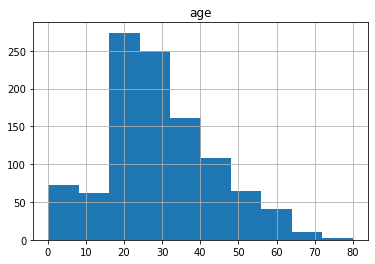

In [35]:
titanic.hist()

O conjunto de dados do Titanic contém apenas uma coluna de dados numéricos, então o diagrama abaixo mostra um histograma para a distribuição de idade. 
Para conjuntos de dados com várias colunas numéricas, **hist** cria um histograma separado para cada coluna numérica.

**Exercício** - Neste exercício, você usará o conjunto de dados de **diamonds** para realizar tarefas semelhantes às que você viu na seção Introdução à ciência de dados. Este conjunto de dados está disponível como **diamonds.csv** em várias fontes, incluindo os sites Kaggle e Rdatasets listados.

O conjunto de dados contém informações sobre 53.940 diamantes, incluindo cada quilate de diamante, corte, cor, clareza, profundidade, mesa (superfície plana), preço e medidas x, y e z. 

Execute as seguintes tarefas para estudar e analisar o conjunto de dados de diamantes:

- a) Baixe **diamonds.csv** de um dos repositórios de conjunto de dados.
- b) Carregue o conjunto de dados em um DataFrame Pandas com a seguinte instrução, que sa a primeira coluna de cada registro como o índice da linha: **df = pd.read_csv ('diamonds.csv', index_col = 0)**
- c) Exiba as primeiras sete linhas do DataFrame.
- d) Exiba as últimas sete linhas do DataFrame.
- e) Use o método **describe** de DataFrame (que olha apenas para as colunas numéricas)
- f) Use o método **describe** da *Serie* para calcular as estatísticas descritivas para as categorias (texto) - *cut*, *color* e *clarity*.
- g) Quais são os valores de categoria exclusivos (use o método de *Serie* **unique**)?
- h) Gere o  os histogramas de cada coluna de dados numéricos.